In [4]:
from pyciss.ringcube import RingCube
import numpy as np
from matplotlib import pyplot as plt

/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pysis/env.py:33: RuntimeWarning: Could not find isis. Is `ISISROOT` set?
  warnings.warn('Could not find isis. Is `ISISROOT` set?', RuntimeWarning)
/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pyciss/meta.py:93: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  all_resonances = pd.concat([prime_resonances, prime_jan_epis])


/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pysis/cubefile.py:113: RuntimeWarning: invalid value encountered in less
  data[data < self.specials['Min']] = numpy.NINF
/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pysis/cubefile.py:114: RuntimeWarning: invalid value encountered in greater
  data[data > self.specials['Max']] = numpy.inf


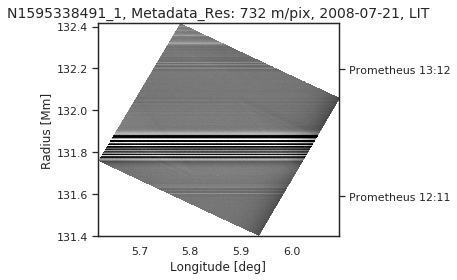

In [2]:
#test1 = RingCube('N1597806864')
test1 = RingCube('N1595338491')
test1.imshow()  #Gives the default plot with axes labels and all

#RingImage('N1560312042',show=False)
#RingImage('N1584974162',show=False)
#RingImage('N1595337686',show=False)
#RingImage('N1595338008',show=False)
#RingImage('N1595338491',show=False)
#RingImage('N1597806864',show=False)
#RingImage('N1625958972',show=False)
#RingImage('N1654249612',show=False)
#RingImage('N1868840683',show=False)

In [1]:
#Function for image saving
#~~~~~~~~~~~~~~~~~~~~~~~~~
def RingImage(filename, save=True, show=True):
    #Setting up the data arrays and useful values
    cube = RingCube(filename)
    data = cube.img
    extent_val = cube.extent
    min_, max_ = np.percentile(data[~np.isnan(data)], (1, 99))
    #w = data.shape[0] / 100.    #not neeeded
    #h = data.shape[1] / 100.    #not neeeded
    lonMin = cube.minlon.value
    lonMax = cube.maxlon.value
    radMin = cube.minrad.value
    radMax = cube.maxrad.value
    
    #Setting up the figure for plotting
    fig = plt.figure(dpi=100, frameon=False)
    ax = plt.axes([0,0,1,1])
    #Fixed figure resolution with 100 dpi: (wxh) = (1000x500 pixels)
    fig.set_size_inches(10., 5.)
    #Removing axis and labels
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('off')
    #Plotting the data array transposed to rotate the image
    plt.imshow(data.T,extent=extent_val,cmap='gray',vmin=min_,vmax=max_,interpolation='none',origin='lower',aspect='auto')
    #Setting these strict x/y limits are necessary for removing white space in the png file
    plt.ylim([radMin,radMax])
    plt.xlim([lonMin,lonMax])
    #If you want to save the file: Please modify the first part of the string to determine its destination
    if save == True:
        plt.savefig('./10_Images_Final/'+filename+'_img.png',dpi=100,format='png',bbox_inches='tight',pad_inches=0,frameon=False)
    else:
        pass
    #If you want to display the image in ipython..
    if show == True:
        plt.show()
    else:
        pass
    plt.close()
    return

#RingImage('N1584974162',save=True,show=True)
#RingImage('N1467345680',save=True,shrink=1.4)
#RingImage('N1467344745')#anomoly
#RingImage('N1467345680')

#RingImage('N1467344745') #soleton
#RingImage('N1467345680') #soleton
#RingImage('N1467351049') #WAY Too big
#RingImage('N1560312042')
#RingImage('N1584974162')
#RingImage('N1595337686')
#RingImage('N1595338491')
#RingImage('N1597806864')
#RingImage('N1625958972')
#RingImage('N1654249612')
#RingImage('N1868840683',save=False)#DONT
#RingImage('N1595338008',show=False)#DONT
#N1625958972

In [19]:
#I used this briefly to potentially test and control the size of images produced
#This is no longer needed, as we have set a fixed pixel resolution
#~~~~
#import subprocess
#p = subprocess.Popen("file test1_savefig.png", stdout=subprocess.PIPE, shell=True)
#(output, err) = p.communicate()
#print(output)

b'test1_savefig.png: PNG image data, 1799 x 1501, 8-bit/color RGBA, non-interlaced\n'


In [2]:
#Used this to cite Michael's plotting scripts
#~~~~
#from pyciss import plotting
#plotting??

/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pysis/cubefile.py:113: RuntimeWarning: invalid value encountered in less
  data[data < self.specials['Min']] = numpy.NINF
/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pysis/cubefile.py:114: RuntimeWarning: invalid value encountered in greater
  data[data > self.specials['Max']] = numpy.inf
/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:908: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


96.34481665992996


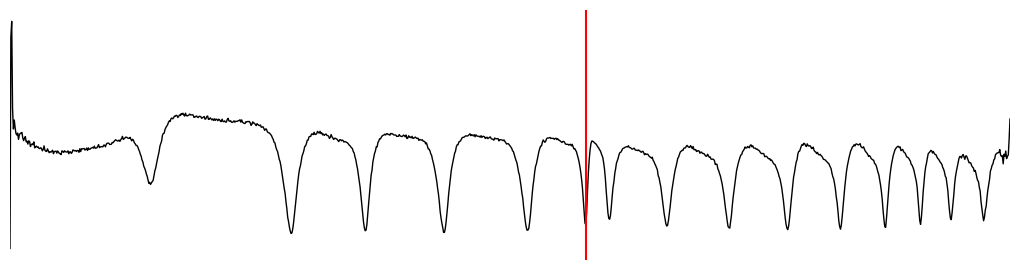

1175
[96.23376498 96.23392924 96.2340935  ... 96.42627533 96.42643958
 96.42660384]


In [13]:
#Function for plot saving
#~~~~~~~~~~~~~~~~~~~~~~~~
def plotDisplay(filename, save=True, show=True):
    #Setting up the data arrays and useful values
    cube = RingCube(filename)
    data = cube.img
    extent_val = cube.extent
    min_, max_ = np.percentile(data[~np.isnan(data)], (1, 99))
    #w = data.shape[0] / 100.     #not needed
    #h = data.shape[1] / 100.     #not needed
    #lonMin = cube.minlon.value   #not needed
    #lonMax = cube.maxlon.value   #not needed
    radMin = cube.minrad.value
    radMax = cube.maxrad.value
    
    #Calculating the y-values of the plot (copied from Michael's code)
    ifs = np.nanmedian(data, axis=1)
    ifs = np.nan_to_num(ifs)
    ifs[ifs < 0] = 0
    
    #Setting up the figure for plotting
    fig = plt.figure(facecolor='white', dpi=100)   #facecolor must = 'white' for the plot to show up in Zooniverse
    ax = plt.axes([0,0,1,1])
    #Fixed figure resolution with 100 dpi: (wxh) = (1000x500 pixels)
    fig.set_size_inches(10., 2.5)
    #Removing axis and labels
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('off')
    #Plotting the intensity profile of the image produced above
    plt.plot(np.linspace(*cube.extent[2:], data.shape[0]), ifs, color='black', lw=1)
    plt.axvline(x=line,color = 'red')
    #plt.axvline(x=cline2,color = 'green')
    #Setting this strict x limit is necessary for removing white space in the png file
    plt.xlim([radMin,radMax])
    #If you want to save the file: Please modify the first part of the string to determine its destination
    if save == True:
        plt.savefig('./10_Images_Final/'+filename+'_plt.png',dpi=100,format='png',bbox_inches='tight',pad_inches=0,frameon=False)
    else:
        pass
    #If you want to display the image in ipython..
    if show == True:
        plt.show()
    else:
        pass
    plt.close()
    return

#plotDisplay('N1467344745')   #soleton
#plotDisplay('N1467345680')  #soleton
#plotDisplay('N1467351049')  #both sides drop
#plotDisplay('N1560312042')  #good
#plotDisplay('N1584974162')  #OG
#plotDisplay('N1595337686')  #low left side
#plotDisplay('N1595338491')  #good?
#plotDisplay('N1597806864')  #left up, big gap, right drop
#plotDisplay('N1625958972')  #mid gap
#plotDisplay('N1654249612')  #mid gap, right drop
#plotDisplay('N1868840683')  #left gap #DONT
#plotDisplay('N1595338008')  #both     #DONT

#x = 672.488647 , 1263.425231 


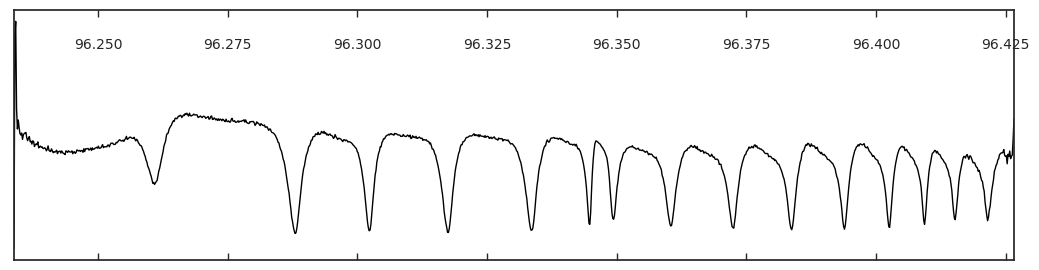

In [11]:
#Function for plot saving
#~~~~~~~~~~~~~~~~~~~~~~~~
def axplotDisplay(filename, save=True, show=True):
    #Setting up the data arrays and useful values
    cube = RingCube(filename)
    data = cube.img
    extent_val = cube.extent
    min_, max_ = np.percentile(data[~np.isnan(data)], (1, 99))
    #w = data.shape[0] / 100.     #not needed
    #h = data.shape[1] / 100.     #not needed
    #lonMin = cube.minlon.value   #not needed
    #lonMax = cube.maxlon.value   #not needed
    radMin = cube.minrad.value
    radMax = cube.maxrad.value
    
    #Calculating the y-values of the plot (copied from Michael's code)
    ifs = np.nanmedian(data, axis=1)
    ifs = np.nan_to_num(ifs)
    ifs[ifs < 0] = 0
    
    #Setting up the figure for plotting
    fig = plt.figure(facecolor='white', dpi=100)   #facecolor must = 'white' for the plot to show up in Zooniverse
    ax = plt.axes([0,0,1,1])
    #Fixed figure resolution with 100 dpi: (wxh) = (1000x500 pixels)
    fig.set_size_inches(10., 2.5)
    #Set up the interior axis shown
    ax.tick_params(axis='both',which='major',direction='in',length=5,width=1,labelsize=10,pad=-30,bottom=True,top=True,labeltop=True,labelbottom=False)
    ax.get_yaxis().set_visible(False)
    #Plotting the intensity profile of the image produced above
    plt.plot(np.linspace(*cube.extent[2:], data.shape[0]), ifs, color='black', lw=1)
    #Setting this strict x limit is necessary for removing white space in the png file
    plt.xlim([radMin,radMax])
    #If you want to save the file: Please modify the first part of the string to determine its destination
    if save == True:
        plt.savefig(filename+'_plt.png',dpi=100,format='png',bbox_inches='tight',pad_inches=0,frameon=False)
    else:
        pass
    #If you want to display the image in ipython..
    if show == True:
        plt.show()
    else:
        pass
    plt.close()
    return

axplotDisplay('N1467344745',save=False)   #soleton
#axplotDisplay('N1467345680',save=False)  #soleton
#axplotDisplay('N1467351049',save=False)  #both sides drop
#axplotDisplay('N1560312042',save=False)  #good
#axplotDisplay('N1584974162',save=False)  #OG
#axplotDisplay('N1595337686',save=False)  #low left side
#axplotDisplay('N1595338491',save=False)  #good?
#axplotDisplay('N1597806864',save=False)  #left up, big gap, right drop
#axplotDisplay('N1625958972',save=False)  #mid gap
#axplotDisplay('N1654249612',save=False)  #mid gap, right drop
#axplotDisplay('N1868840683',save=False)  #left gap #DONT
#axplotDisplay('N1595338008',save=False)  #both     #DONT

[134.29771659]


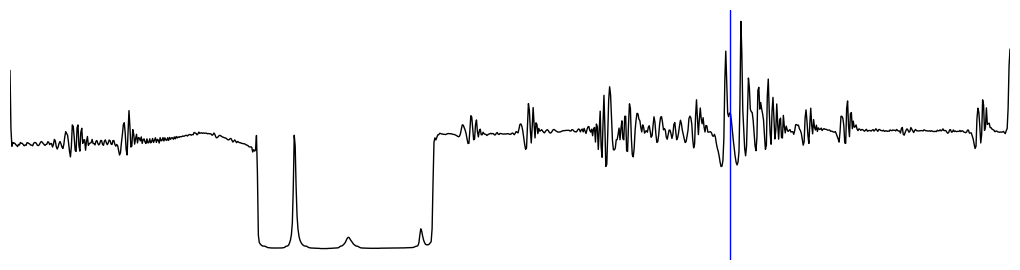

In [89]:
#Plotting image with data export data
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def dataPlot(filename):
    #Setting up the data arrays and useful values
    cube = RingCube(filename)
    data = cube.img
    extent_val = cube.extent
    min_, max_ = np.percentile(data[~np.isnan(data)], (1, 99))
    #w = data.shape[0] / 100.     #not needed
    #h = data.shape[1] / 100.     #not needed
    #lonMin = cube.minlon.value   #not needed
    #lonMax = cube.maxlon.value   #not needed
    radMin = cube.minrad.value
    radMax = cube.maxrad.value
    
    #Calculating the y-values of the plot (copied from Michael's code)
    ifs = np.nanmedian(data, axis=1)
    ifs = np.nan_to_num(ifs)
    ifs[ifs < 0] = 0
    
    lines = np.array([])
    colors = np.array([])
    for _,rows in out.iterrows():
        if rows['subject_ids'] == filename:
            lines = np.append(lines, rows['radius'])
            
            if rows['user_name'] == 'chab5881':
                colors = np.append(colors, 'blue')
            else:
                colors = np.append(colors, 'green')
        else:
            pass
    print(lines)
    #Setting up the figure for plotting
    fig = plt.figure(facecolor='white', dpi=100)   #facecolor must = 'white' for the plot to show up in Zooniverse
    ax = plt.axes([0,0,1,1])
    #Fixed figure resolution with 100 dpi: (wxh) = (1000x500 pixels)
    fig.set_size_inches(10., 2.5)
    #Removing axis and labels
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('off')
    #Plotting the intensity profile of the image produced above
    plt.plot(np.linspace(*cube.extent[2:], data.shape[0]), ifs, color='black', lw=1)
    for i in np.arange(lines.size):
        plt.axvline(x=lines[i],lw=1,color = colors[i])
    #Setting this strict x limit is necessary for removing white space in the png file
    plt.xlim([radMin,radMax])
    plt.show()
    plt.close()
    return

#dataPlot('N1467344745')   #soleton
#dataPlot('N1467345680')  #soleton
#dataPlot('N1467351049')  #both sides drop
#dataPlot('N1584974162')  #OG
#dataPlot('N1595337686')  #low left side
#dataPlot('N1595338491')  #good?
#dataPlot('N1597806864')  #left up, big gap, right drop
#dataPlot('N1625958972')  #mid gap

In [ ]:
np.arrange

In [35]:
#Play with reading data export:
dataExp = 'clicking-test-2-classifications.csv'
csvfile = open(dataExp,'r')
#varname = csvfile.read()
#csvfile.close()
#writtenData = np.genfromtxt(dataExp,dtype=str)
#m = peaks_at[2,:]           #Reads in raw 'total_mass' values 

print(csvfile.readlines()[-1])


146503035,chab5881,1835720,b90e9873c0090a733060,8386,clicking test 2,15.6,2019-02-15 23:24:12 UTC,,,"{""source"":""api"",""session"":""3c571628c6418c2bacade38001b80fee39fad84bc8227ecf3452a1d5abac3fc1"",""viewport"":{""width"":1366,""height"":648},""started_at"":""2019-02-15T23:23:54.032Z"",""user_agent"":""Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"",""utc_offset"":""25200"",""finished_at"":""2019-02-15T23:24:12.118Z"",""live_project"":false,""interventions"":{""opt_in"":true,""message"":false},""user_language"":""en"",""user_group_ids"":[],""subject_dimensions"":[{""clientWidth"":822,""clientHeight"":246,""naturalWidth"":1501,""naturalHeight"":449},{""clientWidth"":822,""clientHeight"":246,""naturalWidth"":1501,""naturalHeight"":450}],""subject_selection_state"":{""retired"":false,""already_seen"":false,""selection_state"":""normal"",""finished_workflow"":false,""user_has_finished_workflow"":false},""workflow_translation_id

In [ ]:
results = pd.read_csv('data_export_file')

In [3]:
import sys

try:
    classfile_in = sys.argv[1]
    markfile_out = sys.argv[2]
except:
    print("\nUsage: "+sys.argv[0]+" classifications_infile markings_outfile")
    print("      classifications_infile: a Zooniverse (Panoptes) classifications data export CSV.")
    print("      markings_outfile: a CSV file with marking information from classifications.")
    print("\nExample: "+sys.argv[0]+" ap-aas229-test-classifications.csv ap-aas229-test-markings.csv")
    sys.exit(0)
#classfile_in = 'ap-aas229-test-classifications.csv'
#markfile_out = 'ap-aas229-test-markings.csv'

import pandas as pd
import json

# Read in classification CSV and expand JSON fields
classifications = pd.read_csv(classfile_in)
classifications['metadata_json'] = [json.loads(q) for q in classifications.metadata]
classifications['annotations_json'] = [json.loads(q) for q in classifications.annotations]
classifications['subject_data_json'] = [json.loads(q) for q in classifications.subject_data]

# Calculate number of markings per classification
# Note: index of annotations_json ("q" here) corresponds to task number (i.e., 0)
classifications['n_markings'] = [ len(q[0]['value']) for q in classifications.annotations_json ]

### Classification Selection / CURRENT SETTING: most recent workflow version
# OPTION 1: Select only classifications from most recent workflow version
iclass = classifications[classifications.workflow_version == classifications['workflow_version'].max()]
# OPTION 2: Select most/all valid classifications using workflow_id and workflow_version
#iclass = classifications[(classifications['workflow_id'] == 1687) & (classifications['workflow_version'] > 40)]


# Output markings from classifications in iclass to new list of dictionaries (prep for pandas dataframe)
# Applicable for workflows with marking task as first task, and outputs data for circular markers (x,y,r)
clist=[]
for index, c in iclass.iterrows():
    if c['n_markings'] > 0:
        # Note: index of annotations_json corresponds to task number (i.e., 0)
        for q in c.annotations_json[0]['value']:
            
            # OPTIONAL EXPANSION: could use if statement here to split marker types
            
            clist.append({'classification_id':c.classification_id, 'user_name':c.user_name, 'user_id':c.user_id,
                          'created_at':c.created_at, 'subject_ids':c.subject_ids, 'tool':q['tool'], 
                          'tool_label':q['tool_label'], 'x':q['x'], 'y':q['y'], 'frame':q['frame']})

# Output list of dictionaries to pandas dataframe and export to CSV.
col_order=['classification_id','user_name','user_id','created_at','subject_ids',
           'tool','tool_label','x','y','frame']
out=pd.DataFrame(clist)[col_order]
out.to_csv(markfile_out,index_label='mark_id')

FileNotFoundError: File b'-f' does not exist

In [4]:
bucket = []
for _, row in df.eterrows():
    print(row)

NameError: name 'df' is not defined

In [3]:
import pandas as pd

pdData = pd.read_csv('10-image-sample-classifications.csv')
#print(pdData.head())
pd.read_csv('10-image-sample-classifications.csv')

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,149171147,chab5881,1835720,d7e1dc451df14e95c9de,9482,10 Image Sample,4.2,2019-02-28 22:31:37 UTC,NaN,NaN,"{""source"":""api"",""session"":""30fc8ce906d1822f661...","[{""task"":""T0"",""task_label"":""Explain what to dr...","{""30931647"":{""retired"":null,""image1"":""N1595338...",30931647
1,149171289,chab5881,1835720,d7e1dc451df14e95c9de,9482,10 Image Sample,4.2,2019-02-28 22:32:15 UTC,NaN,NaN,"{""source"":""api"",""session"":""30fc8ce906d1822f661...","[{""task"":""T0"",""task_label"":""Explain what to dr...","{""30931648"":{""retired"":null,""image1"":""N1597806...",30931648
2,149171620,chab5881,1835720,d7e1dc451df14e95c9de,9482,10 Image Sample,4.2,2019-02-28 22:33:42 UTC,NaN,NaN,"{""source"":""api"",""session"":""30fc8ce906d1822f661...","[{""task"":""T0"",""task_label"":""Explain what to dr...","{""30931644"":{""retired"":null,""image1"":""N1584974...",30931644
3,149171786,chab5881,1835720,d7e1dc451df14e95c9de,9482,10 Image Sample,4.2,2019-02-28 22:34:28 UTC,NaN,NaN,"{""source"":""api"",""session"":""30fc8ce906d1822f661...","[{""task"":""T0"",""task_label"":""Explain what to dr...","{""30931651"":{""retired"":null,""image1"":""N1467344...",30931651
4,149171801,chab5881,1835720,d7e1dc451df14e95c9de,9482,10 Image Sample,4.2,2019-02-28 22:34:32 UTC,NaN,NaN,"{""source"":""api"",""session"":""30fc8ce906d1822f661...","[{""task"":""T0"",""task_label"":""Explain what to dr...","{""30931643"":{""retired"":null,""image1"":""N1560312...",30931643
5,149171964,chab5881,1835720,d7e1dc451df14e95c9de,9482,10 Image Sample,4.2,2019-02-28 22:35:12 UTC,NaN,NaN,"{""source"":""api"",""session"":""30fc8ce906d1822f661...","[{""task"":""T0"",""task_label"":""Explain what to dr...","{""30931649"":{""retired"":null,""image1"":""N1625958...",30931649
6,149172037,chab5881,1835720,d7e1dc451df14e95c9de,9482,10 Image Sample,4.2,2019-02-28 22:35:28 UTC,NaN,NaN,"{""source"":""api"",""session"":""30fc8ce906d1822f661...","[{""task"":""T0"",""task_label"":""Explain what to dr...","{""30931645"":{""retired"":null,""image1"":""N1595337...",30931645
7,149172181,chab5881,1835720,d7e1dc451df14e95c9de,9482,10 Image Sample,4.2,2019-02-28 22:36:01 UTC,NaN,NaN,"{""source"":""api"",""session"":""30fc8ce906d1822f661...","[{""task"":""T0"",""task_label"":""Explain what to dr...","{""30931642"":{""retired"":null,""image1"":""N1467351...",30931642
8,149172255,chab5881,1835720,d7e1dc451df14e95c9de,9482,10 Image Sample,4.2,2019-02-28 22:36:16 UTC,NaN,NaN,"{""source"":""api"",""session"":""30fc8ce906d1822f661...","[{""task"":""T0"",""task_label"":""Explain what to dr...","{""30931650"":{""retired"":null,""image1"":""N1654249...",30931650
9,149172573,chab5881,1835720,d7e1dc451df14e95c9de,9482,10 Image Sample,4.2,2019-02-28 22:37:33 UTC,NaN,NaN,"{""source"":""api"",""session"":""30fc8ce906d1822f661...","[{""task"":""T0"",""task_label"":""Explain what to dr...","{""30931646"":{""retired"":null,""image1"":""N1467345...",30931646


In [4]:
pdData['subject_data'][1]

'{"30931648":{"retired":null,"image1":"N1597806864_img.png","image2":"N1597806864_plt.png","my_own_id":"7"}}'

In [6]:
bucket = []

for _,row in pdData.iterrows():
    
    d = {}
    d['classification_id'] = pdData['classification_id']
    d['username'] = pdData['user_name']

print(d)

{'classification_id': 0     149171147
1     149171289
2     149171620
3     149171786
4     149171801
5     149171964
6     149172037
7     149172181
8     149172255
9     149172573
10    149172890
11    149189342
12    149189453
13    149189691
14    149189852
15    149189940
16    149190047
17    149190209
18    149190336
19    149190495
20    149190638
21    149190675
Name: classification_id, dtype: int64, 'username': 0       chab5881
1       chab5881
2       chab5881
3       chab5881
4       chab5881
5       chab5881
6       chab5881
7       chab5881
8       chab5881
9       chab5881
10      chab5881
11    michaelaye
12    michaelaye
13    michaelaye
14    michaelaye
15    michaelaye
16    michaelaye
17    michaelaye
18    michaelaye
19    michaelaye
20    michaelaye
21    michaelaye
Name: user_name, dtype: object}


In [15]:
import pandas as pd
import json

# Read in classification CSV and expand JSON fields
classifications = pd.read_csv('10-image-sample-classifications.csv')
classifications['metadata_json'] = [json.loads(q) for q in classifications.metadata]
classifications['annotations_json'] = [json.loads(q) for q in classifications.annotations]
classifications['subject_data_json'] = [json.loads(q) for q in classifications.subject_data]

# Calculate number of markings per classification
# Note: index of annotations_json ("q" here) corresponds to task number (i.e., 0)
classifications['n_markings'] = [ len(q[0]['value']) for q in classifications.annotations_json ]

### Classification Selection / CURRENT SETTING: most recent workflow version
# OPTION 1: Select only classifications from most recent workflow version
iclass = classifications[classifications.workflow_version == classifications['workflow_version'].max()]

# OPTION 2: Select most/all valid classifications using workflow_id and workflow_version
#iclass = classifications[(classifications['workflow_id'] == 1687) & (classifications['workflow_version'] > 40)]

#/(1000.))*(radMax-radMin) + radMin
# Output markings from classifications in iclass to new list of dictionaries (prep for pandas dataframe)
# Applicable for workflows with marking task as first task, and outputs data for circular markers (x,y,r)
clist=[]
for index, c in iclass.iterrows():
    if c['n_markings'] > 0:
        # Note: index of annotations_json corresponds to task number (i.e., 0)
        for q in c.annotations_json[0]['value']:
            
            cube = RingCube(c.subject_data_json[str(c.subject_ids)]['image1'][:-8])
            radMin = cube.minrad.value
            radMax = cube.maxrad.value
            
            # OPTIONAL EXPANSION: could use if statement here to split marker types
            
            clist.append({'classification_id':c.classification_id, 'user_name':c.user_name,'subject_ids':c.subject_data_json[str(c.subject_ids)]['image1'][:-8], 'radius':(((q['x']/(1000.))*(radMax-radMin)) + radMin)})

# Output list of dictionaries to pandas dataframe and export to CSV.
col_order=['classification_id','user_name','subject_ids','radius']
out=pd.DataFrame(clist)[col_order]
#out.to_csv(markfile_out,index_label='mark_id')
out

,classification_id,user_name,subject_ids,radius
0,149171147,chab5881,N1595338491,132.212318
1,149171786,chab5881,N1467344745,96.344622
2,149171964,chab5881,N1625958972,134.297717
3,149172573,chab5881,N1467345680,125.377792
4,149172573,chab5881,N1467345680,125.447928
5,149189342,michaelaye,N1584974162,136.440427
6,149189342,michaelaye,N1584974162,136.703015
7,149189453,michaelaye,N1467344745,96.344817
8,149189691,michaelaye,N1467345680,125.285091
9,149189691,michaelaye,N1467345680,125.383994


In [43]:
#print(out.index)
#print('---')
#print(out.columns)
#print('---')
#print(out.values)
#print(type(out.loc[1]))

for i,rows in out.iterrows():
    print(i)
    print(rows['subject_ids'] == 'N1595338491')

0
True
1
False
2
False
3
False
4
False
5
False
6
False
7
False
8
False
9
False
10
False
11
False
12
False
13
False
14
False
15
True


In [80]:
xt = np.array([])
xt = np.append(xt,'red')
xt = np.append(xt,13)
print(xt)

['red' '13']


In [92]:
classifications = pd.read_csv('10-image-sample-classifications.csv')
#classifications['metadata_json'] = [json.loads(q) for q in classifications.metadata]
classifications['annotations_json'] = [json.loads(q) for q in classifications.annotations]
classifications['subject_data_json'] = [json.loads(q) for q in classifications.subject_data]
#classifications['metadata_json']
#for q in classifications.subject_data:
#    json.loads(q)
#    print(q)
#    print(json.loads(q))

#for q in classifications.annotations_json:
#    print(q[0])
    #len(q[0]['value'])

print(json.loads(classifications.subject_data[0])['30931647']['image1'])
print(type(json.loads(classifications.subject_data[0])['30931647']['image1']))

N1595338491_img.png
<class 'str'>


In [93]:
for index, c in iclass.iterrows():
    print(c)

classification_id                                            149171147
user_name                                                     chab5881
user_id                                                        1835720
user_ip                                           d7e1dc451df14e95c9de
workflow_id                                                       9482
workflow_name                                          10 Image Sample
workflow_version                                                   4.2
created_at                                     2019-02-28 22:31:37 UTC
gold_standard                                                      NaN
expert                                                             NaN
metadata             {"source":"api","session":"30fc8ce906d1822f661...
annotations          [{"task":"T0","task_label":"Explain what to dr...
subject_data         {"30931647":{"retired":null,"image1":"N1595338...
subject_ids                                                   30931647
metada

In [121]:
for index, c in iclass.iterrows():
    if c['n_markings'] > 0:
        print(c.annotations_json[0]['value'][0]['x'])
        print(type(c.annotations_json[0]['value'][0]['x']))

800.6705932617188
<class 'float'>
574.8707275390625
<class 'float'>
719.8713989257812
<class 'float'>
725.0151977539062
<class 'float'>
404.714599609375
<class 'float'>
575.8781127929688
<class 'float'>
522.4293823242188
<class 'float'>
870.8410034179688
<class 'float'>
840.452880859375
<class 'float'>
769.3115844726562
<class 'float'>
798.5811157226562
<class 'float'>
